# ACTIVIDAD 4.2 TOKIO

In [2]:
#Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de archivos y revisión de información

In [3]:
data = pd.read_csv('Tokio_sin_nulos.csv')  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18736 entries, 0 to 18735
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   18736 non-null  int64  
 1   last_scraped                 18736 non-null  object 
 2   name                         18736 non-null  object 
 3   description                  18736 non-null  object 
 4   neighborhood_overview        18736 non-null  object 
 5   host_location                18736 non-null  object 
 6   host_response_time           18736 non-null  object 
 7   host_response_rate           18736 non-null  float64
 8   host_acceptance_rate         18736 non-null  float64
 9   host_is_superhost            18736 non-null  object 
 10  host_verifications           18736 non-null  object 
 11  host_has_profile_pic         18736 non-null  object 
 12  host_identity_verified       18736 non-null  object 
 13  neighbourhood   

In [4]:
#Revisamos cuantos valores nulos hay en el dataset
data.isnull().sum().sum()

np.int64(0)

## Procesamiento de outlaiers

In [5]:
#Creamos dos dataframes para poder procesar los outliers numéricos
cuantitativas = data.select_dtypes(include = ['float64', 'int64'])
cualitativas = data.select_dtypes(include = ['object'])

<Figure size 1500x800 with 0 Axes>

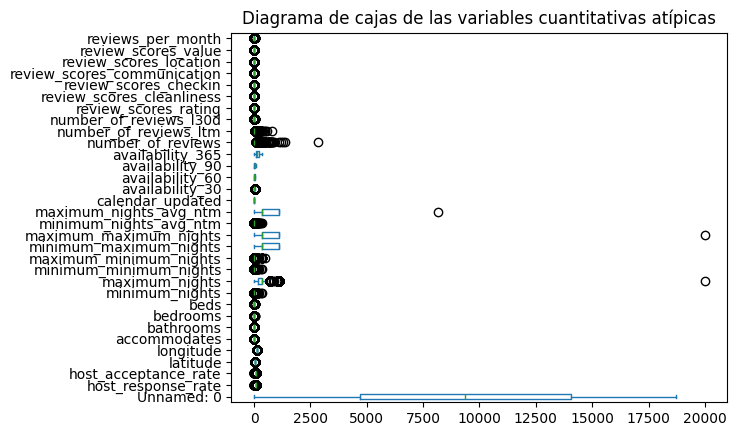

In [6]:
#Graficamos el diagrama de cajas para las variables cuantitativas atípicas
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title('Diagrama de cajas de las variables cuantitativas atípicas')
plt.show()

In [7]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18736 entries, 0 to 18735
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   18736 non-null  int64  
 1   host_response_rate           18736 non-null  float64
 2   host_acceptance_rate         18736 non-null  float64
 3   latitude                     18736 non-null  float64
 4   longitude                    18736 non-null  float64
 5   accommodates                 18736 non-null  int64  
 6   bathrooms                    18736 non-null  float64
 7   bedrooms                     18736 non-null  float64
 8   beds                         18736 non-null  float64
 9   minimum_nights               18736 non-null  int64  
 10  maximum_nights               18736 non-null  int64  
 11  minimum_minimum_nights       18736 non-null  float64
 12  maximum_minimum_nights       18736 non-null  float64
 13  minimum_maximum_

In [8]:
#Valores extremos aplicando los limites superiores e inferiores
y = cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido Unnamed: 0                     25593.784972
host_response_rate               115.599351
host_acceptance_rate             121.140307
latitude                          35.822937
longitude                        139.955093
accommodates                      13.256735
bathrooms                          3.435470
bedrooms                           4.624341
beds                               8.731066
minimum_nights                    32.334834
maximum_nights                  1434.049457
minimum_minimum_nights            31.258837
maximum_minimum_nights            48.735653
minimum_maximum_nights          1763.778013
maximum_maximum_nights          1889.143939
minimum_nights_avg_ntm            33.877064
maximum_nights_avg_ntm          1778.225198
calendar_updated                   0.000000
availability_30                   31.335589
availability_60                   71.393958
availability_90                  116.136858
availability_365                 444.444106
number

In [9]:
#Obtenemos datos y los outliers se converten en nulos en el dataset
data2 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data2

,Unnamed: 0,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,100.0,91.0,35.717070,139.826080,2.0,1.0,1.0,2.0,3.0,...,180.0,7.0,1.0,4.78,4.91,4.84,4.83,4.55,4.80,1.14
1,1,100.0,100.0,35.738440,139.769170,1.0,1.0,1.0,1.0,3.0,...,NaN,10.0,2.0,4.98,4.91,4.98,4.98,4.84,4.92,1.79
2,2,100.0,100.0,35.678780,139.678470,6.0,1.0,2.0,4.0,3.0,...,NaN,35.0,3.0,4.80,4.80,4.88,4.92,4.80,4.80,1.65
3,3,100.0,100.0,35.658000,139.671340,2.0,1.0,1.0,2.0,2.0,...,NaN,11.0,0.0,4.95,4.84,4.94,4.98,4.92,4.90,1.92
4,4,100.0,93.0,35.743630,139.798520,3.0,1.5,1.0,0.0,2.0,...,125.0,26.0,2.0,4.78,4.79,4.94,4.91,4.73,4.81,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,18731,100.0,100.0,35.702643,139.653547,6.0,1.0,2.0,3.0,2.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18732,18732,100.0,100.0,35.742981,139.631591,4.0,1.0,2.0,4.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18733,18733,100.0,100.0,35.711557,139.701221,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18734,18734,100.0,100.0,35.710939,139.699703,3.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [10]:
#Revisamos cuantos valores nulos hay en el dataset por columnas
data2.isnull().sum()

Unnamed: 0                       0
host_response_rate             212
host_acceptance_rate           397
latitude                       602
longitude                      252
accommodates                   377
bathrooms                      230
bedrooms                       249
beds                           279
minimum_nights                  24
maximum_nights                   1
minimum_minimum_nights          24
maximum_minimum_nights          60
minimum_maximum_nights           0
maximum_maximum_nights           1
minimum_nights_avg_ntm          30
maximum_nights_avg_ntm           1
calendar_updated                 0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              328
number_of_reviews_ltm          126
number_of_reviews_l30d         210
review_scores_rating           294
review_scores_cleanliness      313
review_scores_checkin          269
review_scores_commun

In [11]:
#Reemplazamos los valores nulos por la media de la columna
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

,Unnamed: 0,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,100.0,91.0,35.717070,139.826080,2.0,1.0,1.0,2.0,3.0,...,180.0,7.0,1.0,4.78,4.91,4.84,4.83,4.55,4.80,1.14
1,1,100.0,100.0,35.738440,139.769170,1.0,1.0,1.0,1.0,3.0,...,31.4,10.0,2.0,4.98,4.91,4.98,4.98,4.84,4.92,1.79
2,2,100.0,100.0,35.678780,139.678470,6.0,1.0,2.0,4.0,3.0,...,31.4,35.0,3.0,4.80,4.80,4.88,4.92,4.80,4.80,1.65
3,3,100.0,100.0,35.658000,139.671340,2.0,1.0,1.0,2.0,2.0,...,31.4,11.0,0.0,4.95,4.84,4.94,4.98,4.92,4.90,1.92
4,4,100.0,93.0,35.743630,139.798520,3.0,1.5,1.0,0.0,2.0,...,125.0,26.0,2.0,4.78,4.79,4.94,4.91,4.73,4.81,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,18731,100.0,100.0,35.702643,139.653547,6.0,1.0,2.0,3.0,2.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18732,18732,100.0,100.0,35.742981,139.631591,4.0,1.0,2.0,4.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18733,18733,100.0,100.0,35.711557,139.701221,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18734,18734,100.0,100.0,35.710939,139.699703,3.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [12]:
#Revisamos cuantos valores nulos hay en el dataset por columnas
valores_nulos = data_clean.isnull().sum()
valores_nulos

Unnamed: 0                     0
host_response_rate             0
host_acceptance_rate           0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
calendar_updated               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

## Procedimiento "CUANTILES" para sustituir outlaiers en el DataFrame

In [13]:
#Aplicamos cuartiles 0.25 y 0.75 para identificar los outliers
y = cuantitativas
percentil25 = y.quantile(0.25) #Q1
percentil75 = y.quantile(0.75) #Q3
iqr = percentil75 - percentil25

Limite_superior_iqr = percentil75 + 1.5*iqr
Limite_inferior_iqr = percentil25 - 1.5*iqr
print("Limite superior permitido", Limite_superior_iqr)
print("Limite inferior permitido", Limite_inferior_iqr)

Limite superior permitido Unnamed: 0                     28102.500000
host_response_rate               100.000000
host_acceptance_rate             103.000000
latitude                          35.774833
longitude                        139.928918
accommodates                      12.000000
bathrooms                          1.523814
bedrooms                           3.500000
beds                               6.000000
minimum_nights                     3.500000
maximum_nights                   642.500000
minimum_minimum_nights             3.500000
maximum_minimum_nights             6.000000
minimum_maximum_nights          2265.000000
maximum_maximum_nights          2265.000000
minimum_nights_avg_ntm             6.000000
maximum_nights_avg_ntm          2265.000000
calendar_updated                   0.000000
availability_30                   24.500000
availability_60                   69.500000
availability_90                  119.000000
availability_365                 446.500000
number

In [14]:
#Obtenemos datos y los outliers se converten en nulos en el dataset
data3_iqr = cuantitativas[(y <= Limite_superior_iqr) & (y >= Limite_inferior_iqr)]
data3_iqr

,Unnamed: 0,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,100.0,NaN,35.717070,139.826080,2.0,1.0,1.0,2.0,3.0,...,NaN,7.0,1.0,4.78,4.91,4.84,4.83,4.55,4.80,1.14
1,1,100.0,100.0,35.738440,139.769170,1.0,1.0,1.0,1.0,3.0,...,NaN,10.0,2.0,4.98,4.91,4.98,4.98,4.84,4.92,1.79
2,2,100.0,100.0,35.678780,139.678470,6.0,1.0,2.0,4.0,3.0,...,NaN,35.0,3.0,4.80,4.80,4.88,4.92,4.80,4.80,1.65
3,3,100.0,100.0,35.658000,139.671340,2.0,1.0,1.0,2.0,2.0,...,NaN,11.0,0.0,4.95,4.84,4.94,4.98,4.92,4.90,1.92
4,4,100.0,NaN,35.743630,139.798520,3.0,1.5,1.0,0.0,2.0,...,NaN,26.0,2.0,4.78,4.79,4.94,4.91,4.73,4.81,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,18731,100.0,100.0,35.702643,139.653547,6.0,1.0,2.0,3.0,2.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18732,18732,100.0,100.0,35.742981,139.631591,4.0,1.0,2.0,4.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18733,18733,100.0,100.0,35.711557,139.701221,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18734,18734,100.0,100.0,35.710939,139.699703,3.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [15]:
#Corroboramos cuantos valores nulos hay en el dataset
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                        0
host_response_rate             1847
host_acceptance_rate           1994
latitude                       1646
longitude                       297
accommodates                    467
bathrooms                      1994
bedrooms                        794
beds                            723
minimum_nights                 2249
maximum_nights                 2666
minimum_minimum_nights         1868
maximum_minimum_nights         3032
minimum_maximum_nights            0
maximum_maximum_nights            1
minimum_nights_avg_ntm         2426
maximum_nights_avg_ntm            1
calendar_updated                  0
availability_30                1106
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews              1639
number_of_reviews_ltm           680
number_of_reviews_l30d          379
review_scores_rating            790
review_scores_cleanliness       596
review_scores_checkin       

In [16]:
#Reemplazamos los valores nulos por la media de la columna
data_clean_iqr = data3_iqr.copy()
data_clean_iqr = data_clean_iqr.fillna(round(data3_iqr.mean(),1))
data_clean_iqr

,Unnamed: 0,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,100.0,99.2,35.717070,139.826080,2.0,1.0,1.0,2.0,3.0,...,22.3,7.0,1.0,4.78,4.91,4.84,4.83,4.55,4.80,1.14
1,1,100.0,100.0,35.738440,139.769170,1.0,1.0,1.0,1.0,3.0,...,22.3,10.0,2.0,4.98,4.91,4.98,4.98,4.84,4.92,1.79
2,2,100.0,100.0,35.678780,139.678470,6.0,1.0,2.0,4.0,3.0,...,22.3,35.0,3.0,4.80,4.80,4.88,4.92,4.80,4.80,1.65
3,3,100.0,100.0,35.658000,139.671340,2.0,1.0,1.0,2.0,2.0,...,22.3,11.0,0.0,4.95,4.84,4.94,4.98,4.92,4.90,1.92
4,4,100.0,99.2,35.743630,139.798520,3.0,1.5,1.0,0.0,2.0,...,22.3,26.0,2.0,4.78,4.79,4.94,4.91,4.73,4.81,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,18731,100.0,100.0,35.702643,139.653547,6.0,1.0,2.0,3.0,2.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18732,18732,100.0,100.0,35.742981,139.631591,4.0,1.0,2.0,4.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18733,18733,100.0,100.0,35.711557,139.701221,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18734,18734,100.0,100.0,35.710939,139.699703,3.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [17]:
#Revisamos cuantos valores nulos hay en el dataset por columnas
valores_nulos = data_clean_iqr.isnull().sum()
valores_nulos

Unnamed: 0                     0
host_response_rate             0
host_acceptance_rate           0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
calendar_updated               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

In [18]:
#Unimos los dataframes cualitativos y cuantitativos
data_clean_iqr = pd.concat([cualitativas, data_clean_iqr], axis = 1)
data_clean_iqr

,last_scraped,name,description,neighborhood_overview,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2024-09-27,Oshiage Holiday Apartment,?,?,"Tokyo, Japan",within a day,t,"['email', 'phone']",t,t,...,22.3,7.0,1.0,4.78,4.91,4.84,4.83,4.55,4.80,1.14
1,2024-09-27,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,Japan,within an hour,t,"['email', 'phone']",t,t,...,22.3,10.0,2.0,4.98,4.91,4.98,4.98,4.84,4.92,1.79
2,2024-09-27,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,"Tokyo, Japan",within an hour,t,"['email', 'phone']",t,t,...,22.3,35.0,3.0,4.80,4.80,4.88,4.92,4.80,4.80,1.65
3,2024-09-27,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,"Tokyo, Japan",within a few hours,t,"['email', 'phone']",t,t,...,22.3,11.0,0.0,4.95,4.84,4.94,4.98,4.92,4.90,1.92
4,2024-09-27,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,"Tokyo, Japan",within an hour,t,"['email', 'phone']",t,t,...,22.3,26.0,2.0,4.78,4.79,4.94,4.91,4.73,4.81,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,2024-09-27,高元寺站徒步4分钟,Relax in this unique and serene retreat.,?,"Suginami City, Japan",within an hour,f,"['email', 'phone']",t,t,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18732,2024-09-27,和绮新快乐居（独享三间房）,This one-of-a-kind home is unique in its own w...,?,"Tokyo, Japan",within an hour,f,['phone'],f,t,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18733,2024-09-27,G0305 位于新宿区中心位置，适合家庭和情侣；距離山手线高田马场站6分钟，交通便利，无电梯,Please relax with your family.<br />Narita Air...,?,"Tokyo, Japan",within an hour,f,"['email', 'phone']",t,t,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00
18734,2024-09-27,G0202 位于新宿区中心位置，适合家庭和情侣；距離山手线高田马场站6分钟，交通便利，无电梯,Please relax with your family.<br />Narita Air...,?,"Tokyo, Japan",within an hour,f,"['email', 'phone']",t,t,...,0.0,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [19]:
#Revisamos cuantos valores nulos hay en el dataset
valores_nulos = data_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

## Creación del archivo CSV

In [20]:
data_clean_iqr.to_csv("Tokio_sin_outliers.csv")